# pandas seaborn features

In [10]:
# pip install seaborn

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('default')

In [12]:
covid_df = pd.read_csv('data/covid_df.csv', index_col=False)

In [13]:
countries = ['Russia', 'Australia', 'Germany', 'Canada', 'United Kingdom']
croped_covid_df = covid_df[covid_df['country'].isin(countries)]

populations = pd.DataFrame([
    ['Canada', 37664517],
    ['Germany', 83721496],
    ['Russia', 145975300],
    ['Australia', 25726900],
    ['United Kingdom', 67802690]
    ],
    columns=['country', 'population']
)
croped_covid_df = croped_covid_df.merge(populations, on=['country'])
croped_covid_df['daily_confirmed_per_hundred'] = croped_covid_df['daily_confirmed'] / croped_covid_df['population'] * 100
croped_covid_df.head()

,date,country,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines,death_rate,recover_rate,population,daily_confirmed_per_hundred
0,2020-01-23,Australia,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25726900,NaN
1,2020-01-25,Australia,4.0,0.0,0.0,4.0,4.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,25726900,0.000016
2,2020-01-26,Australia,4.0,0.0,0.0,4.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,25726900,0.000000
3,2020-01-27,Australia,5.0,0.0,0.0,5.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,25726900,0.000004
4,2020-01-28,Australia,5.0,0.0,0.0,5.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,25726900,0.000000


### .histplot()
* data= DF name on which graph is built
* x= column name for axis x
* y= column name for axis y
* hue= column name on which data is grouped
* ax= axes index 
* color=color
* bins= number of column in histogram (calculated automatically by default)
* kde=False by default smooth of histogram of curve

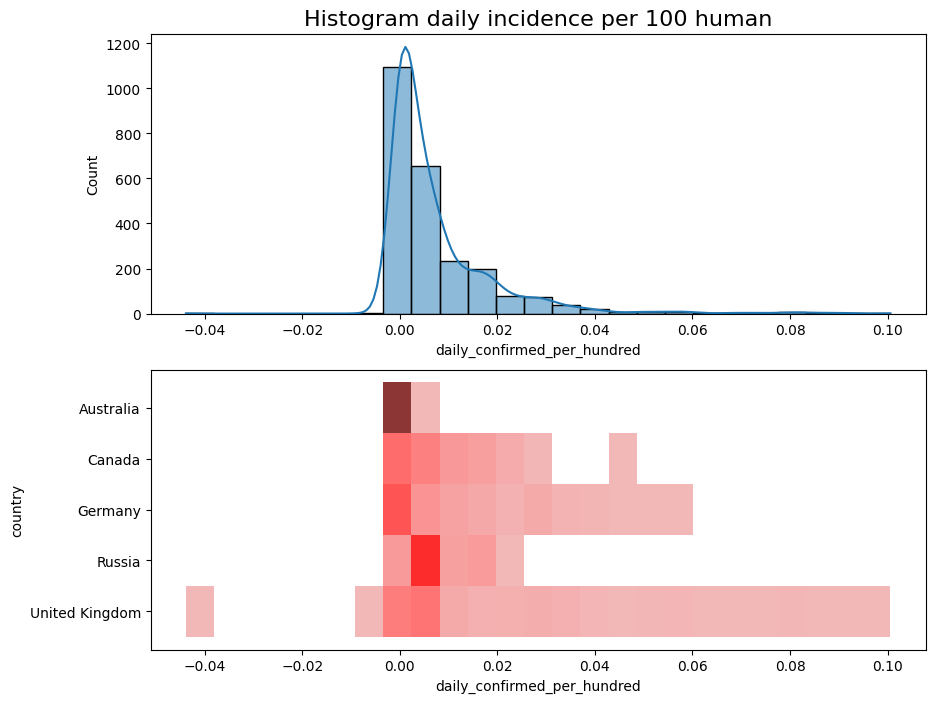

In [14]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10,8))

sns.histplot(
    data=croped_covid_df,
    x='daily_confirmed_per_hundred',
    bins=25,
    kde=True,
    ax=axes[0]
);
axes[0].set_title('Histogram daily incidence per 100 human', fontsize=16)

sns.histplot(
    data=croped_covid_df,
    x='daily_confirmed_per_hundred',
    y='country',
    bins=25,
    color='red',
    ax=axes[1]
);


### .boxplot()
* data= DF name on which graph is built
* x= column name for axis x
* y= column name for axis y
* hue= column name on which data is grouped
* ax= axes index 
* color=color
* orient= 'v' vertical, 'h' horizontal

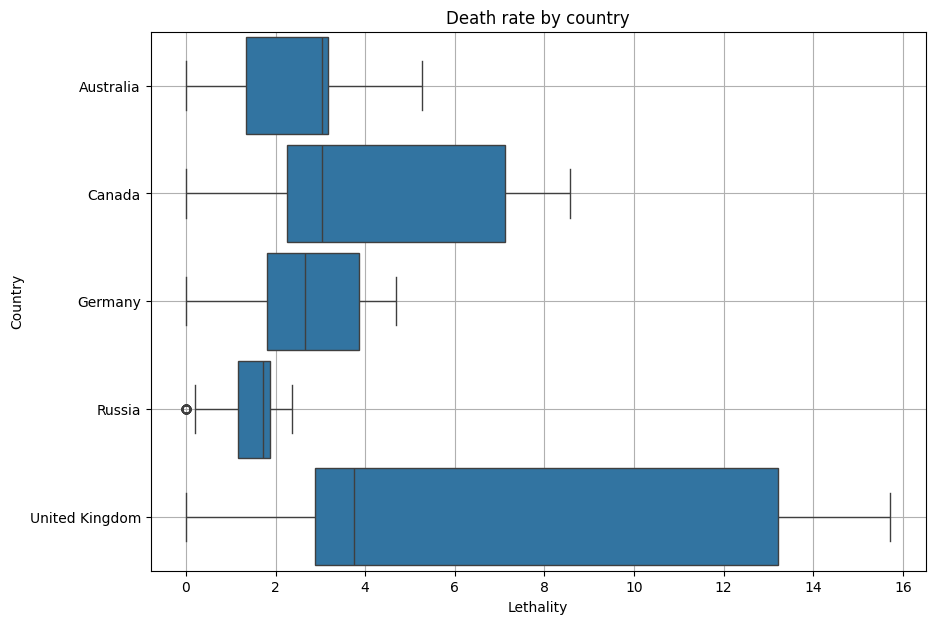

In [15]:
fig = plt.figure(figsize=(10, 7))
boxplot = sns.boxplot(
    data=croped_covid_df,
    y='country',
    x='death_rate',
    orient='h',
    width=0.9
)
boxplot.set_title('Death rate by country');
boxplot.set_xlabel('Lethality');
boxplot.set_ylabel('Country');
boxplot.grid()

### .barplot()
* data= DF name on which graph is built
* x= column name for axis x
* y= column name for axis y
* hue= column name on which data is grouped
* color=color
* orient= 'v' vertical, 'h' horizontal

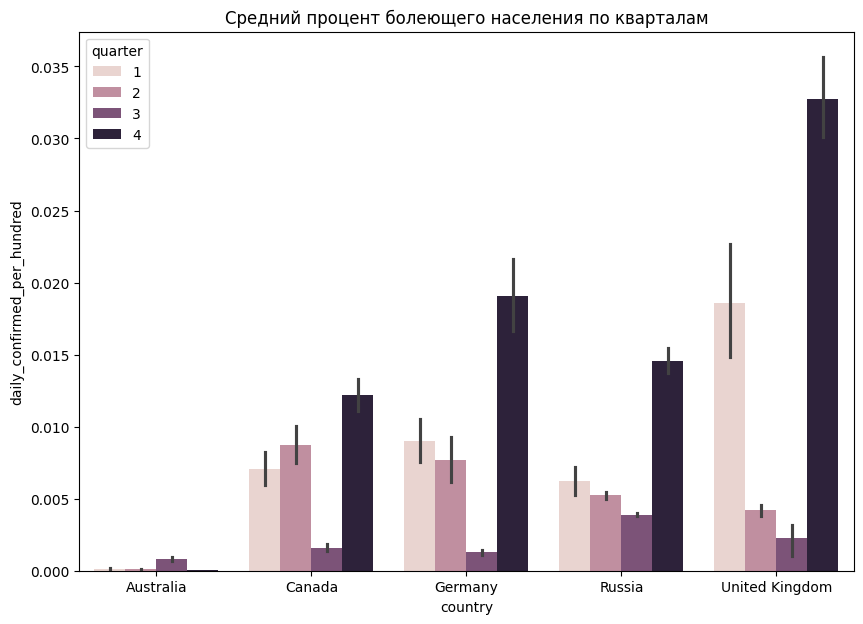

In [19]:
fig = plt.figure(figsize=(10, 7))
croped_covid_df['date'] = pd.to_datetime(croped_covid_df['date'])
croped_covid_df['quarter'] = croped_covid_df['date'].dt.quarter
barplot = sns.barplot(
    data=croped_covid_df,
    x='country',
    y='daily_confirmed_per_hundred',
    hue='quarter',
)
barplot.set_title('Средний процент болеющего населения по кварталам');

### .jointplot() 
* data= DF name on which graph is built
* x= column name for axis x
* y= column name for axis y
* hue= column name on which data is grouped
* xlim= (min, max) values for axis x
* ylim= (min, max) values for axis y
* height= size of square graph 


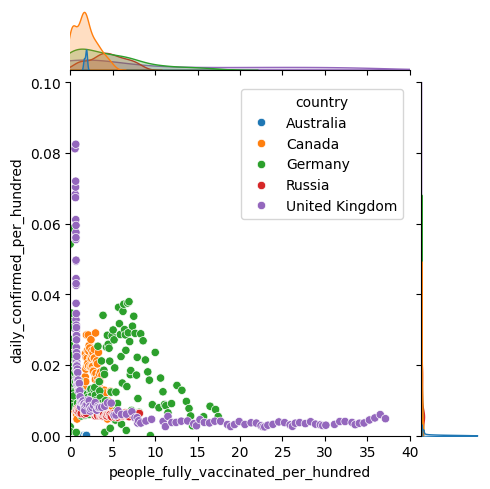

In [ ]:
jointplot = sns.jointplot(
    data=croped_covid_df, 
    x='people_fully_vaccinated_per_hundred', 
    y='daily_confirmed_per_hundred',
    hue='country',
    xlim=(0, 40),
    ylim=(0, 0.1),
    height=5
);

In [30]:
pivot = croped_covid_df.pivot_table(
    values='people_vaccinated_per_hundred',
    columns='date',
    index='country',
)
pivot.columns = pivot.columns.astype('string')
display(pivot)

date,2020-12-13,2020-12-14,2020-12-15,2020-12-16,2020-12-17,2020-12-18,2020-12-19,2020-12-20,2020-12-21,2020-12-22,...,2021-05-20,2021-05-21,2021-05-22,2021-05-23,2021-05-24,2021-05-25,2021-05-26,2021-05-27,2021-05-28,2021-05-29
country,,,,,,,,,,,,,,,,,,,,,
Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,12.40,12.69,12.88,13.28,13.73,14.18
Canada,NaN,0.0,0.00,0.01,0.02,0.03,0.03,0.03,0.05,0.07,...,48.10,49.25,50.14,50.89,51.77,52.39,53.05,53.95,54.99,55.71
Germany,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,39.18,39.68,39.95,40.11,40.29,40.64,41.29,41.87,42.40,42.61
Russia,NaN,NaN,0.02,NaN,NaN,NaN,NaN,NaN,NaN,0.04,...,10.20,10.30,10.50,10.53,10.70,10.81,11.07,11.12,11.19,11.29
United Kingdom,0.13,NaN,NaN,NaN,NaN,NaN,NaN,0.99,NaN,NaN,...,55.01,55.33,55.63,55.82,55.99,56.27,56.61,56.99,57.29,57.56


.heatmap()
* Данный метод работает с табличными данными и визуализирует все ячейки таблицы с помощью цвета
* annot= отвечает за отображение легенды
* cmap= отвечает за цветовую гамму

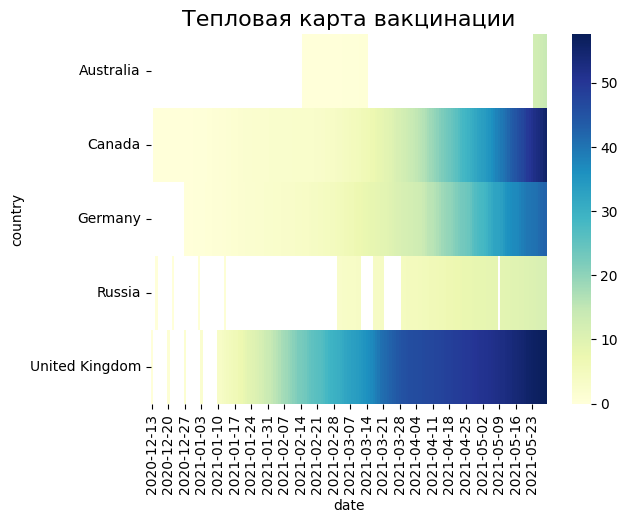

In [31]:
heatmap = sns.heatmap(data=pivot, cmap='YlGnBu')
heatmap.set_title('Тепловая карта вакцинации', fontsize=16);

In [43]:
mask_1 = croped_covid_df['confirmed']
mask_2 = croped_covid_df['population']
croped_covid_df['confirmed_per_hundred'] = mask_1 / mask_2 * 100
pivot_1 = croped_covid_df.pivot_table(
    values='confirmed_per_hundred',
    columns=croped_covid_df['date'].dt.month,
    index='country'
)
pivot_1.columns = pivot_1.columns.astype('string')
display(pivot_1)

date,1,2,3,4,5,6,7,8,9,10,11,12
country,,,,,,,,,,,,
Australia,0.088609,0.055214,0.058886,0.069548,0.070396,0.028843,0.045355,0.089161,0.103769,0.106373,0.107866,0.109343
Canada,1.554508,1.084408,1.229839,1.512013,1.802933,0.266956,0.296350,0.330083,0.379746,0.524684,0.809013,1.287373
Germany,2.134815,1.375932,1.577158,1.940083,2.174951,0.225779,0.241395,0.270664,0.319453,0.449884,0.978326,1.700788
Russia,2.321078,1.354627,1.492748,1.597834,1.708751,0.367587,0.513411,0.629979,0.737320,0.940273,1.322722,1.858516
United Kingdom,4.709455,2.929344,3.161152,3.318284,3.361177,0.439553,0.435330,0.472383,0.568537,1.046803,2.007343,2.919542


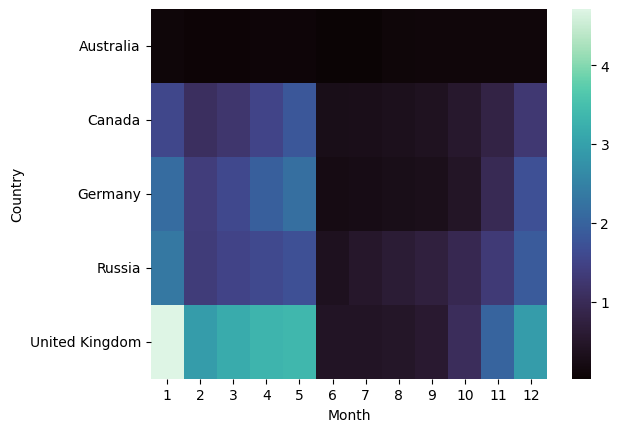

In [46]:
pivot_map = sns.heatmap(
    data=pivot_1,
    cmap='mako'
)
pivot_map.set_ylabel('Country');
pivot_map.set_xlabel('Month');

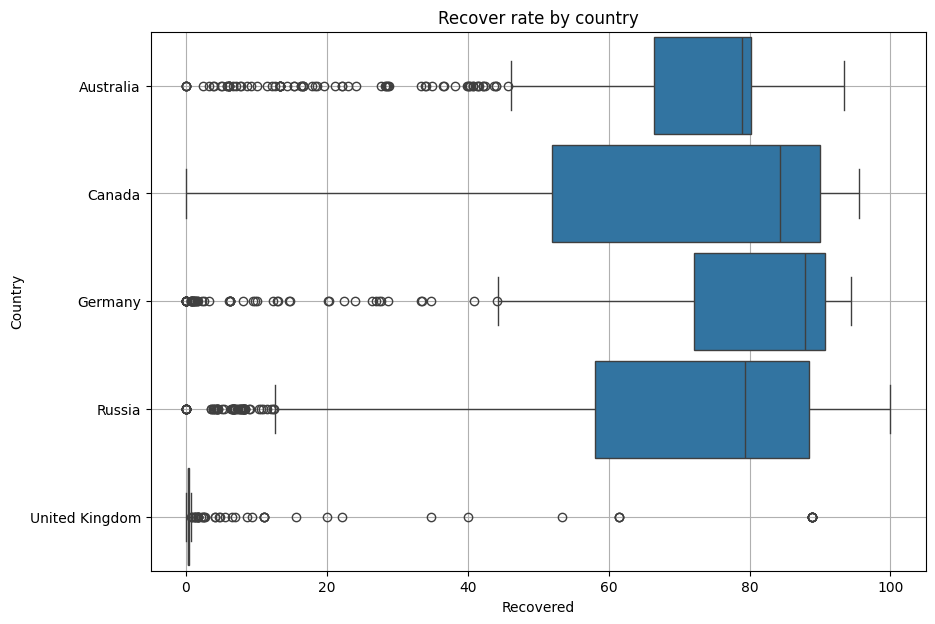

In [49]:
fig = plt.figure(figsize=(10, 7))
boxplot = sns.boxplot(
    data=croped_covid_df,
    y='country',
    x='recover_rate',
    orient='h',
    width=0.9
)
boxplot.set_title('Recover rate by country');
boxplot.set_xlabel('Recovered');
boxplot.set_ylabel('Country');
boxplot.grid()